<a href="https://colab.research.google.com/github/shapi88/tensorflow_book/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/

## Creating data to view and fit

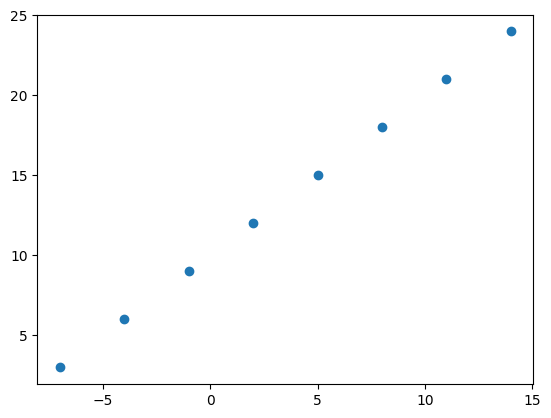

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

# Create features
X = np.array([[-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]])

# Create labels
Y = np.array([[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]])

# Visualize it
plt.scatter(X, Y);

In [ ]:
X + 10, Y == X + 10

(array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]]),
 array([[ True,  True,  True,  True,  True,  True,  True,  True]]))

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_price, house_info

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>)

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((1, 8), (1, 8))

In [ ]:
X[0], Y[0]

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
X[0].shape, Y[0].shape

((8,), (8,))

In [ ]:
X.ndim, Y[0].ndim

(2, 1)

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)

In [ ]:
X,Y

(<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]], dtype=float32)>)

In [ ]:
X + 10 == Y 

<tf.Tensor: shape=(1, 8), dtype=bool, numpy=array([[ True,  True,  True,  True,  True,  True,  True,  True]])>

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape, X[0], Y[0], X[0].shape, Y[0].shape

(TensorShape([1, 8]),
 TensorShape([1, 8]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 TensorShape([8]),
 TensorShape([8]))

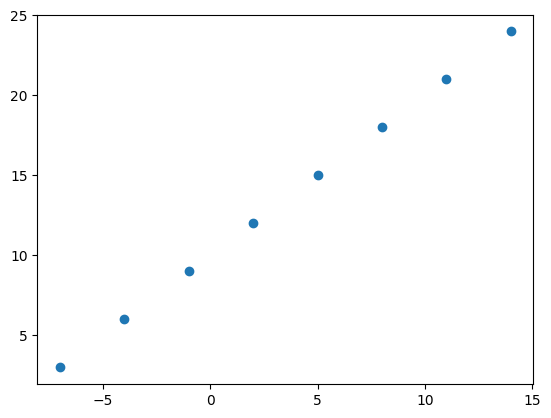

In [ ]:
plt.scatter(X,Y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,))
  #tf.keras.layers.Dense(1)
])
# model.add(tf.keras.Input(shape=(16,2)))
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model

model.fit(X[0], Y[0], epochs=5, workers=10)

Epoch 1/5
1/1 [==============================] - 0s 447ms/step - loss: 13.6569 - mae: 13.6569
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 13.5244 - mae: 13.5244
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 13.3919 - mae: 13.3919
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 13.2594 - mae: 13.2594
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 13.1269 - mae: 13.1269


In [ ]:
X,Y

(<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]], dtype=float32)>)

In [ ]:
model.predict([17.0]), model.predict([20.0]), 

1/1 [==============================] - 0s 28ms/step


(array([[2.262775]], dtype=float32), array([[2.6532648]], dtype=float32))

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.

3. **Fitting a model **- here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
I, J, K = tf.constant(np.array([5, 15]), dtype=tf.float32), tf.constant(np.array([10, 45]), dtype=tf.float32), tf.constant(np.array([34]), dtype=tf.float32)
i, j, k = tf.constant(np.array([10]), dtype=tf.float32), tf.constant(np.array([15]), dtype=tf.float32), tf.constant(np.array([7,8,9,10]), dtype=tf.float32)
I,J,K, i, j, 

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 5., 15.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([10., 45.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([34.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([10.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([15.], dtype=float32)>)

In [ ]:
X,Y

(<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]], dtype=float32)>)

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),
  tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),
  tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model

model.fit(X[0], Y[0], epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 709ms/step - loss: 13.6425 - mae: 13.6425
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2979 - mae: 11.2979
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5474 - mae: 8.5474
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 5.2912 - mae: 5.2912
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 5.1593 - mae: 5.1593
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 6.3562 - mae: 6.3562
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 6.0551 - mae: 6.0551
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 4.9155 - mae: 4.9155
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 3.8199 - mae: 3.8199
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 4.3875 - mae: 4.3875
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - l

In [ ]:
model.predict([17])#, tf.reshape(X, shape=(1,8,)) # reshaping the X vector

1/1 [==============================] - 0s 66ms/step


array([[26.271423]], dtype=float32)

In [ ]:
X,Y

(<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]], dtype=float32)>)

In [ ]:
model.predict([-7.])

1/1 [==============================] - 0s 68ms/step


array([[3.1626103]], dtype=float32)

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=None, input_shape=(1,)),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model

model.fit(X[0], Y[0], epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 459ms/step - loss: 12.3900 - mae: 12.3900
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3897 - mae: 11.3897
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3755 - mae: 10.3755
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3429 - mae: 9.3429
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2850 - mae: 8.2850
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1940 - mae: 7.1940
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 6.9452 - mae: 6.9452
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3684 - mae: 7.3684
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.7106 - mae: 7.7106
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.7374 - mae: 7.7374
Epoch 11/100
1/1 [==============================] - 0s 8ms/step -

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 60ms/step


array([[26.621283]], dtype=float32)


## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

`Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...`
When it comes to evaluation... there are 3 words you should memorize:

> `"Visualize, visualize, visualize"`

It's a good idea to visualize:

The data - what data are we working with? What does it look like?

*  The model itself - what does our model look like?
*  The training of a model - how does a model perform while it learns?
*  The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X + 10 
len(Y), Y, X[-1],Y[-1]+10


(50,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=96>,
 <tf.Tensor: shape=(), dtype=int32, numpy=116>)

In [ ]:
# 1. model creation
model = tf.keras.Sequential()
# 1.1 Adding Layers
model.add(tf.keras.layers.Dense(100, activation=None, input_shape=(1,)))
model.add(tf.keras.layers.Dense(1))
# 2. model compilation
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. model fit
model.fit(tf.cast(X, dtype=tf.float32), tf.cast(Y, dtype=tf.float32), epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 6ms/step - loss: 44.3100 - mae: 44.3100
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 20.3527 - mae: 20.3527
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 10.5547 - mae: 10.5547
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 17.9050 - mae: 17.9050
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 17.1773 - mae: 17.1773
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 11.0422 - mae: 11.0422
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 9.1543 - mae: 9.1543
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 10.6655 - mae: 10.6655
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 11.0743 - mae: 11.0743
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 8.4241 - mae: 8.4241
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 7.

In [ ]:
model.predict([106.]),  X[-1]+10, Y[-1]+10

1/1 [==============================] - 0s 56ms/step


(array([[109.371025]], dtype=float32),
 <tf.Tensor: shape=(), dtype=int32, numpy=106>,
 <tf.Tensor: shape=(), dtype=int32, numpy=116>)

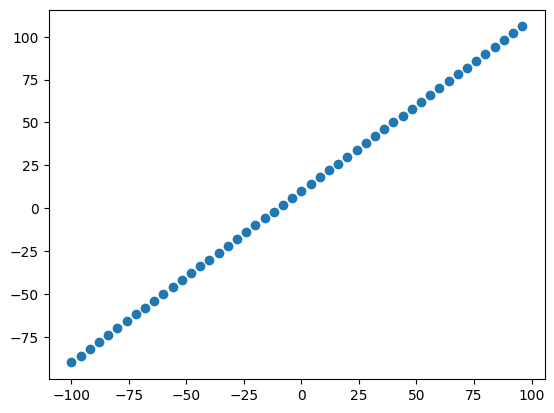

In [ ]:
plt.scatter(X, Y)

## The 3 sets...

**Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

**Test set**- the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [ ]:
# check how many samples do we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data) 
Y_train = Y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

In [ ]:
X_train, Y_train, X_test, Y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

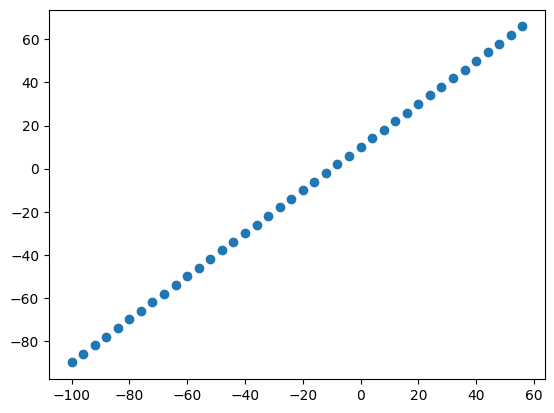

In [ ]:
# Visualizing the train data

plt.scatter(X_train, Y_train)

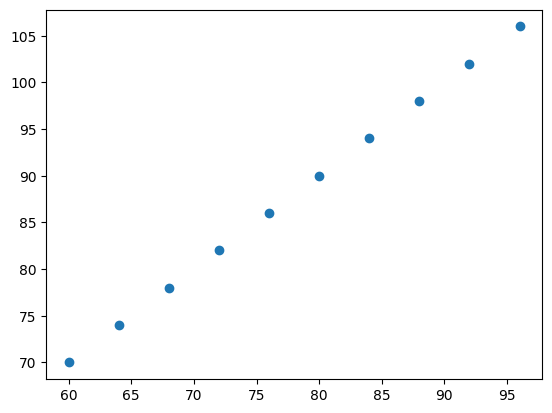

In [ ]:
# Visualizing the test data

plt.scatter(X_test, Y_test)

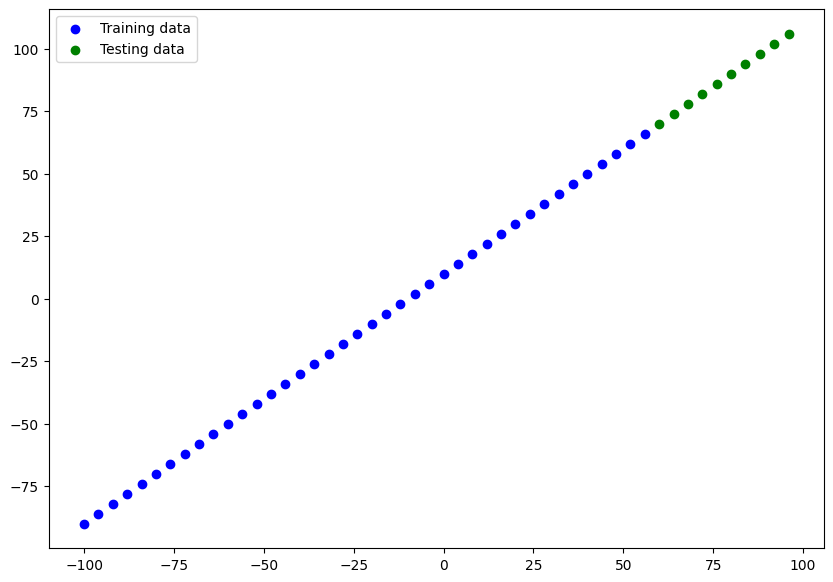

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [ ]:
tf.random.set_seed(42)
# 1. create a model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)))
model.add(tf.keras.layers.Dense(100, input_shape=[1]))
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
# 2. compile a model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    #optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)
# 3. fit a model
#model.fit(X_train, Y_train, epochs=100)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.build()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

* **Total params** - total number of parameters in the model.
Trainable parameters - these are the parameters (patterns) the model can update as it trains.

* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).

📖 **Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.
https://www.youtube.com/watch?v=QDX-1M5Nj7s & 
http://introtodeeplearning.com/

📖 **Resource**: https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed.

🛠 **Exercise**: Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary().

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, Y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


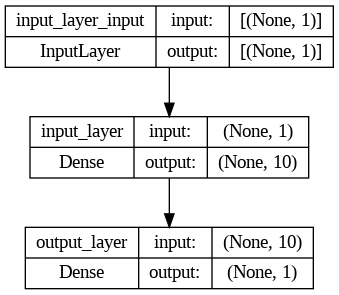

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
Y_pred = model.predict(X_test)
Y_pred, Y_test

1/1 [==============================] - 0s 43ms/step


(array([[ 76.41999],
        [ 81.39985],
        [ 86.37969],
        [ 91.35955],
        [ 96.3394 ],
        [101.31924],
        [106.2991 ],
        [111.27893],
        [116.25879],
        [121.23864]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

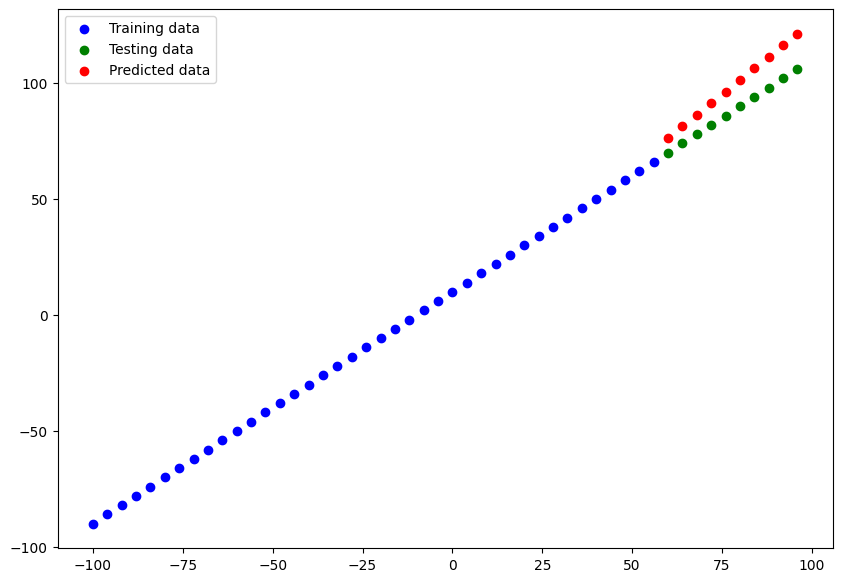

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Plot predicted data
plt.scatter(X_test, Y_pred, c="r", label="Predicted data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

🔑 **Note**: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

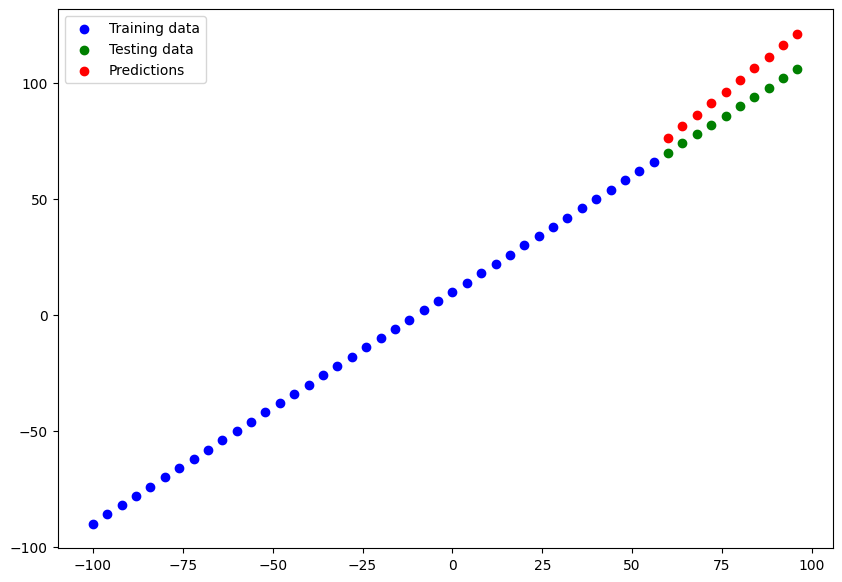

In [ ]:
plot_predictions()

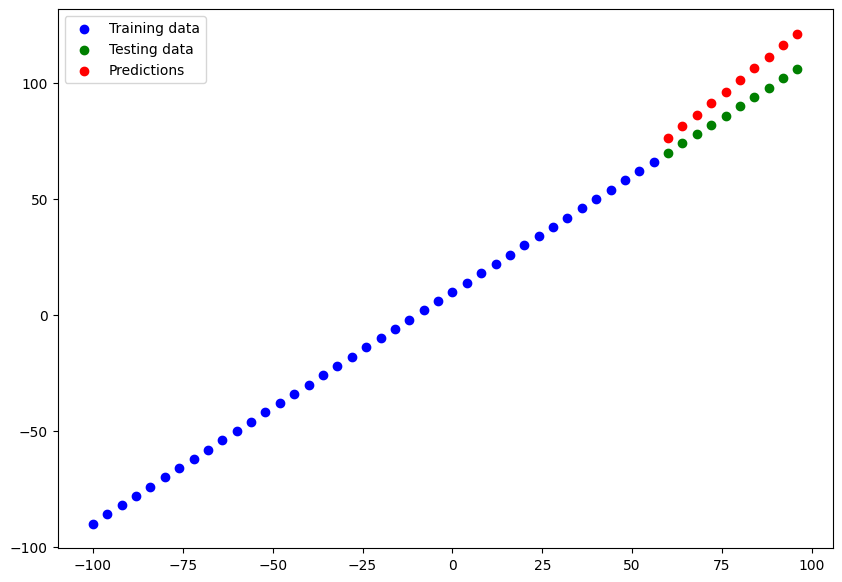

In [ ]:

plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_pred)

## Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:



* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"
* **MSE** - mean square error, "square the average errors"

In [ ]:
# Evaluate the test data
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 152ms/step - loss: 10.8293 - mae: 10.8293


[10.82931900024414, 10.82931900024414]

In [ ]:
Y_pred

array([[ 76.41999],
       [ 81.39985],
       [ 86.37969],
       [ 91.35955],
       [ 96.3394 ],
       [101.31924],
       [106.2991 ],
       [111.27893],
       [116.25879],
       [121.23864]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# calculate the mean absolute error
# need to be transformed into a tensorflow object with tf.constant
# need the same shape -> squeeze 
# mean(abs(Y_test-Ypred))
tf.keras.losses.MAE(Y_test, tf.squeeze(tf.constant(Y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=10.829318>

In [ ]:
# calculate the mea square error
# same techique as above, converting to tf object, then squeeze the shape
tf.keras.losses.MSE(Y_test, tf.squeeze(tf.constant(Y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=125.19499>

## Running experiments to improve our model

`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...`
* **Get more data** - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* **Train for longer** - give your model more of a chance to find patterns in the data.
Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2.`model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
**Build `model_1`**



In [ ]:
X_train, Y_train, X_test, Y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:

# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model_1.fit(X_train, Y_train, epochs=100, verbose=0)

In [ ]:
Y_pred = model_1.predict(X_test)
Y_pred

1/1 [==============================] - 0s 54ms/step


array([[ 75.92495 ],
       [ 80.87012 ],
       [ 85.815285],
       [ 90.76045 ],
       [ 95.70562 ],
       [100.65079 ],
       [105.595955],
       [110.54111 ],
       [115.486275],
       [120.43144 ]], dtype=float32)

In [ ]:
mae_1 = tf.keras.losses.MAE(Y_test, tf.squeeze(Y_pred))
mse_1 = tf.keras.losses.MSE(Y_test, tf.squeeze(Y_pred))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=10.178199>,
 <tf.Tensor: shape=(), dtype=float32, numpy=110.965775>)

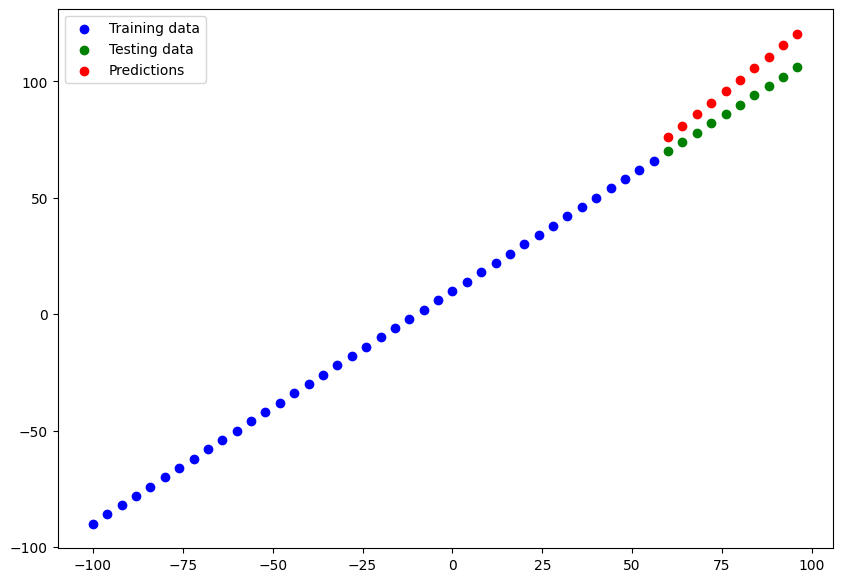

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_pred)

In [ ]:
# model_2 - 2 layers, trained for 100 epochs
# 1. create model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

# 2. compile model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. fit model
model_2.fit(X_train, Y_train, epochs=100, verbose=0)

In [ ]:
Y_pred = model_2.predict(X_test)
Y_pred

1/1 [==============================] - 0s 45ms/step


array([[ 78.16168 ],
       [ 83.258224],
       [ 88.35477 ],
       [ 93.4513  ],
       [ 98.54784 ],
       [103.64437 ],
       [108.740906],
       [113.837456],
       [118.93399 ],
       [124.030525]], dtype=float32)

In [ ]:
mae_2 = tf.keras.losses.MAE(Y_test, tf.squeeze(Y_pred))
mse_2 = tf.keras.losses.MSE(Y_test, tf.squeeze(Y_pred))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.096106>,
 <tf.Tensor: shape=(), dtype=float32, numpy=181.42776>)

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

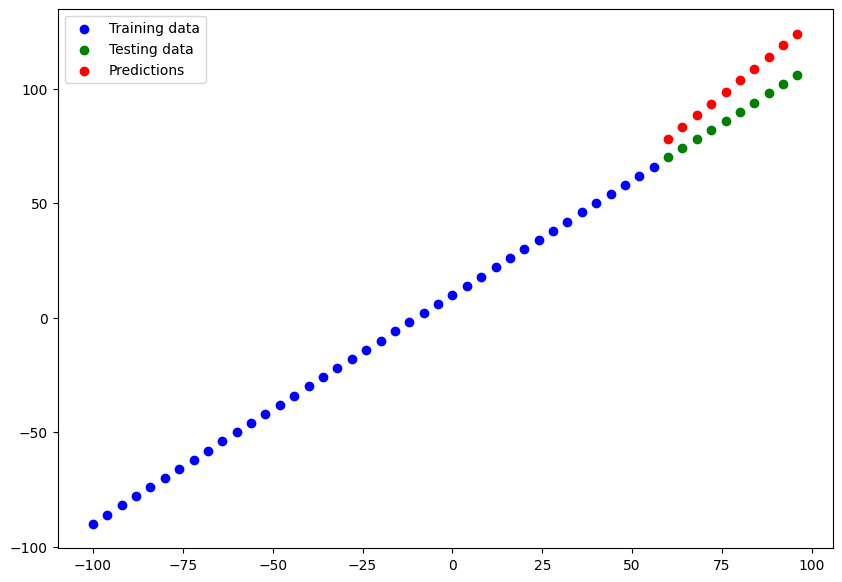

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_pred)

In [ ]:
# model_3 - 2 layers, trained for 500 epochs
tf.random.set_seed(42)
#1. create model
model_3 = tf.keras.Sequential([  
  tf.keras.layers.Dense(10, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

#2. compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
#3. fit model
model_3.fit(X_train, Y_train, epochs=500, verbose=0)

In [ ]:
Y_pred = model_3.predict(X_test)
Y_pred, Y_test

1/1 [==============================] - 0s 44ms/step


(array([[15.827398],
        [16.588488],
        [17.349575],
        [18.110664],
        [18.871752],
        [19.63284 ],
        [20.393929],
        [21.155018],
        [21.916107],
        [22.677193]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
mae_3 = tf.keras.losses.MAE(Y_test, tf.squeeze(Y_pred))
mse_3 = tf.keras.losses.MSE(Y_test, tf.squeeze(Y_pred))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.7477>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4812.794>)

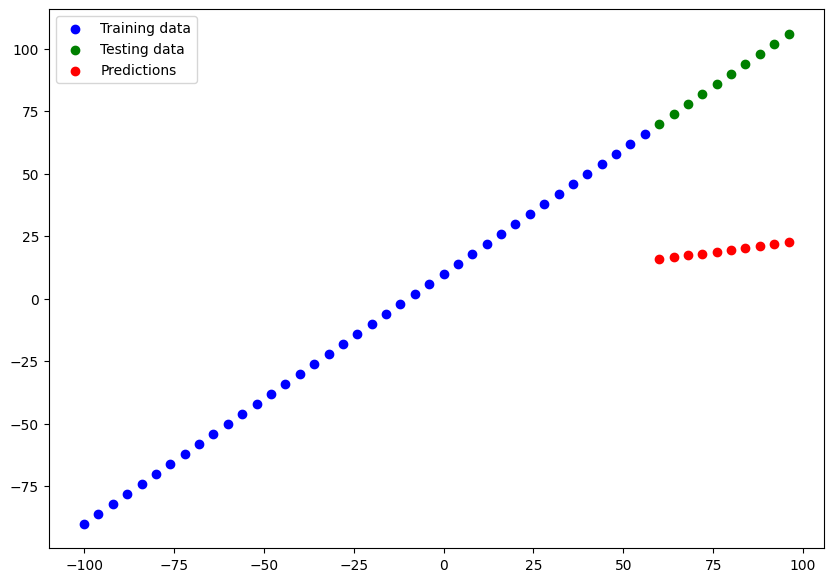

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_pred)

In [ ]:
# tuned model
tf.random.set_seed(42)

# 1. create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation=None, input_shape=[1], name='input_layer_1'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='tuned_model')
# compile model
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)
# fit model
model_4.fit(X_train, Y_train, epochs=500, verbose=0)

In [ ]:
Y_pred = model_4.predict(X_test)
Y_pred, Y_test

1/1 [==============================] - 0s 46ms/step


(array([[ 67.38204 ],
        [ 71.30431 ],
        [ 75.2266  ],
        [ 79.14887 ],
        [ 83.071144],
        [ 86.99343 ],
        [ 90.9157  ],
        [ 94.83798 ],
        [ 98.76026 ],
        [102.68254 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
mae_4 = tf.keras.losses.MAE(Y_test, tf.squeeze(Y_pred))
mse_4 = tf.keras.losses.MSE(Y_test, tf.squeeze(Y_pred))
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=2.967711>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.857143>)

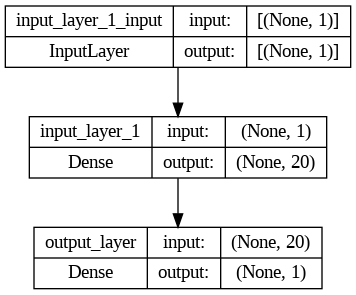

In [ ]:
plot_model(model=model_4, show_shapes=True)

In [ ]:
model_4.summary()

Model: "tuned_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


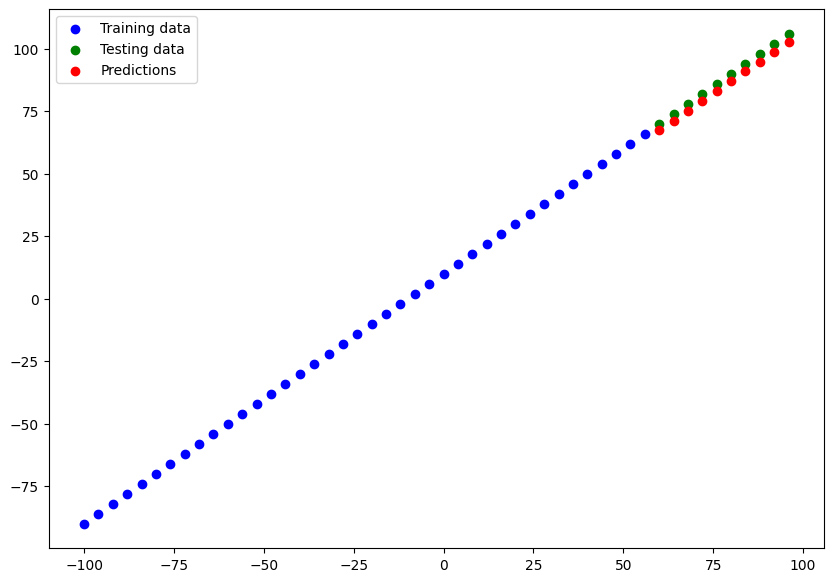

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_pred)

In [ ]:
import pandas as pd

model_result = [
    ['model_1', mae_1.numpy(), mse_1.numpy()],
    ['model_2', mae_2.numpy(), mse_2.numpy()],
    ['model_3', mae_3.numpy(), mse_3.numpy()],
    ['model_4', mae_4.numpy(), mse_4.numpy()],
                ]
model_result

[['model_1', 10.178199, 110.965775],
 ['model_2', 13.096106, 181.42776],
 ['model_3', 68.7477, 4812.794],
 ['model_4', 2.967711, 8.857143]]

In [ ]:
all_results = pd.DataFrame(model_result, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,10.178199,110.965775
1,model_2,13.096106,181.427765
2,model_3,68.747704,4812.793945
3,model_4,2.967711,8.857143


> 🔑 **Note**: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

In [ ]:
model_4.summary()

Model: "tuned_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource**: As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* [Weights & Biases](https://wandb.ai/site) - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_4.save("best_model_SavedModel_format")

In [ ]:

# Save model using the HDF5 format
model_4.save("best_model_HDF5_format.h5")

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "tuned_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Compare model_2 predictions with SavedModel format model predictions
model_4_preds = model_4.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_4_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:

# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

In [ ]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=Y_test, y_pred=model_4_preds) == mae(y_true=Y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "tuned_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [ ]:
#!mkdir /content/drive/MyDrive/tensorflow_course
!ls /content/drive/MyDrive/tensorflow_course/

best_model_HDF5_format.h5


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:

# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:

# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)
#1. create the model insurance
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

#2. compile the model insurance (mae,SGD)
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
#3.fit the model
insurance_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8662.4854 - mae: 8662.4854
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7884.5615 - mae: 7884.5615
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7567.7910 - mae: 7567.7910
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7701.9443 - mae: 7701.9443
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7664.1372 - mae: 7664.1372
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7641.8975 - mae: 7641.8975
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7580.0537 - mae: 7580.0537
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7829.6895 - mae: 7829.6895
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7492.4492 - mae: 7492.4492
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7685.6567 - mae: 7685.6567

In [ ]:
# Evaluate test data
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8574.0664 - mae: 8574.0664


[8574.06640625, 8574.06640625]

In [ ]:
Y_train.median(), Y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

Add an extra layer with more hidden units and use the Adam optimizer
Same as above but train for longer (200 epochs)
(insert your own experiment here)

In [ ]:
X_train, Y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13296.3369 - mae: 13296.3369
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13118.2646 - mae: 13118.2646
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12746.0205 - mae: 12746.0205
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12023.3652 - mae: 12023.3652
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10829.8174 - mae: 10829.8174
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9340.7188 - mae: 9340.7188
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8036.1147 - mae: 8036.1147
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7488.3037 - mae: 7488.3037
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.8252 - mae: 7409.8252
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7389.7451 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4623.6465 - mae: 4623.6465


[4623.646484375, 4623.646484375]

In [ ]:
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8574.0664 - mae: 8574.0664


[8574.06640625, 8574.06640625]

In [ ]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13248.1123 - mae: 13248.1123
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13018.1426 - mae: 13018.1426
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12557.6484 - mae: 12557.6484
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 11706.4111 - mae: 11706.4111
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10411.5781 - mae: 10411.5781
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 8945.9209 - mae: 8945.9209
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7816.2329 - mae: 7816.2329
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7460.5820 - mae: 7460.5820
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7412.3745 - mae: 7412.3745
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7393.1143 - mae:

In [ ]:
insurance_model_3.evaluate(X_train, Y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3661.6792 - mae: 3661.6792


[3661.67919921875, 3661.67919921875]

In [ ]:
insurance_model.evaluate(X_train, Y_train)

34/34 [==============================] - 0s 994us/step - loss: 8711.3096 - mae: 8711.3096


[8711.3095703125, 8711.3095703125]

Text(0.5, 0, 'epochs')

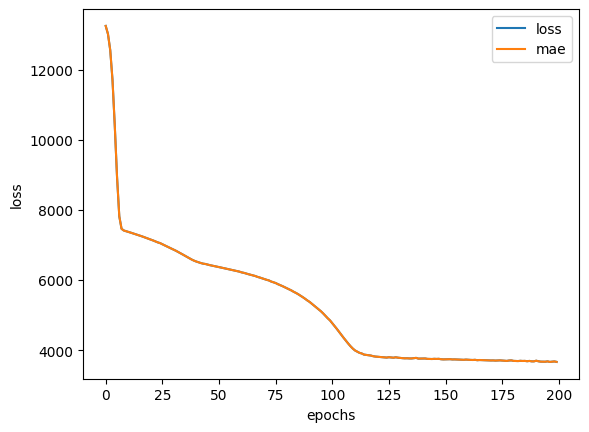

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> 🤔 Question: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance
     

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
X = insurance.drop('charges', axis=1)
y = insurance["charges"]
X, y


(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

<Axes: >

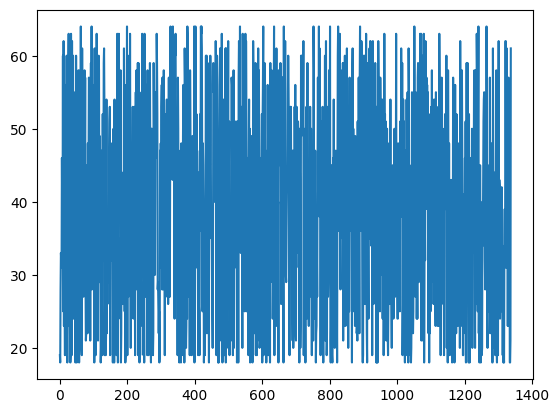

In [ ]:
X['age'].plot()

<Axes: ylabel='Frequency'>

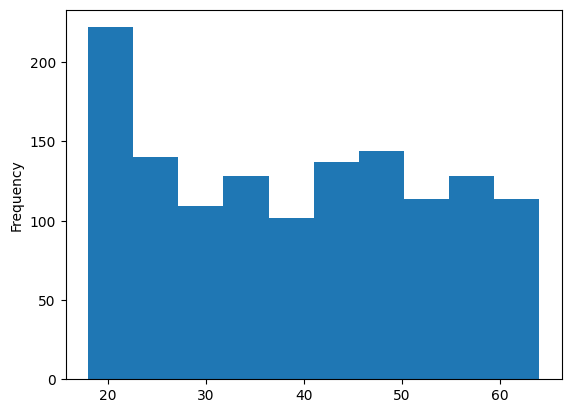

In [ ]:
X['age'].plot(kind='hist') 

<Axes: ylabel='Frequency'>

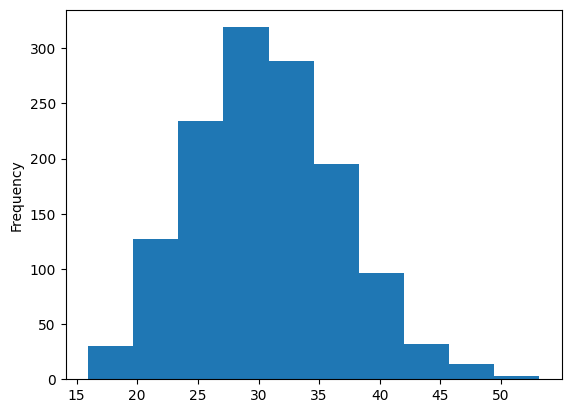

In [ ]:
X['bmi'].plot(kind='hist') 

<Axes: ylabel='Frequency'>

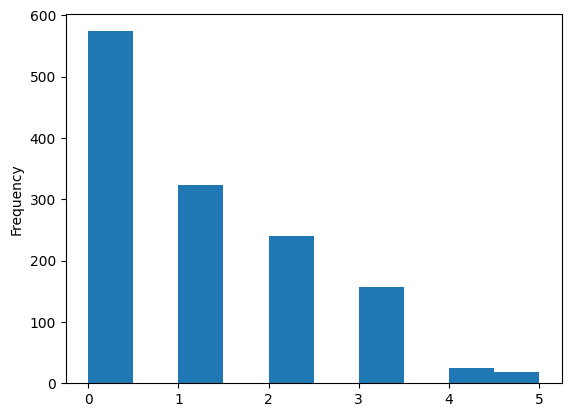

In [ ]:
X['children'].plot(kind='hist')

In [ ]:
X['smoker'].plot(kind='hist')

TypeError: ignored

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# To prepare our data, we can borrow a few classes from Scikit-Learn.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region']))

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fit the column transformer to our training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_train_normal, X_test_normal

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.7

In [ ]:
# What does our data look like now?
X_train.loc[1]

age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
Name: 1, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# set seed randomness
tf.random.set_seed(42)

# create model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# compile model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# fit
history = insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 9402.3105 - mae: 9402.3105
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 4626.4365 - mae: 4626.4365
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 3702.6851 - mae: 3702.6851
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 3631.1997 - mae: 3631.1997
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 3646.6382 - mae: 3646.6382
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 3690.0962 - mae: 3690.0962
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 3717.2151 - mae: 3717.2151
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 3611.5610 - mae: 3611.5610
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3659.3596 - mae: 3659.3596
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3738.2168 - mae: 3738.2168

Text(0.5, 0, 'epochs')

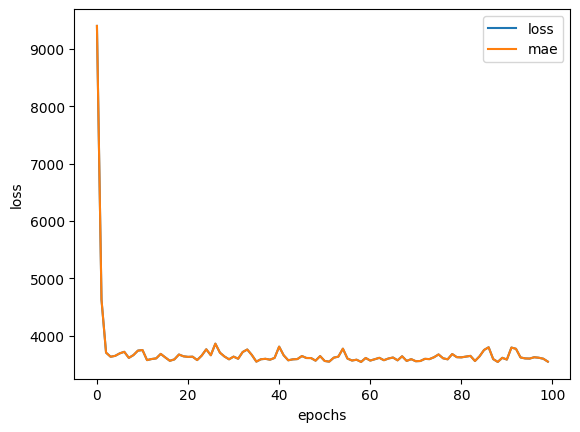

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3211.5864 - mae: 3211.5864


[3211.58642578125, 3211.58642578125]

In [ ]:
# 34/34 [==============================] - 0s 1ms/step - loss: 3661.6792 - mae: 3661.6792
# [3661.67919921875, 3661.67919921875]

Our model (`insurance_model`) fit on normalized data achieved a ~30% better score compared to the same model (`insurnace_model_2`) fit on non-normalized data!

In [ ]:
insurance_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               1200      
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insurance_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 100)               1200      
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
